In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank_train = pd.read_csv("train.csv")
bank_test = pd.read_csv("test.csv")

In [3]:
# Basic Data exploration

In [4]:
bank_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
bank_train.shape

(165034, 14)

In [6]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
bank_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
#EDA and Encoding

In [9]:
bank_train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
bank_test.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [11]:
any(bank_train.duplicated())

False

In [12]:
for col in bank_train.columns:
    if bank_train[col].dtype == 'object':
        print(col,bank_train[col].nunique())

Surname 2797
Geography 3
Gender 2


In [13]:
for col in bank_test.columns:
    if bank_test[col].dtype == 'object':
        print(col,bank_test[col].nunique())

Surname 2708
Geography 3
Gender 2


In [14]:
geography_encoded = pd.get_dummies(bank_train['Geography'],prefix='Geography')
bank_train = pd.concat([bank_train,geography_encoded],axis=1)

In [15]:
geography_encoded_1 = pd.get_dummies(bank_test['Geography'],prefix='Geography')
bank_test= pd.concat([bank_test,geography_encoded_1],axis=1)

In [16]:
gender_encoded = pd.get_dummies(bank_train['Gender'],prefix='Gender')
bank_train= pd.concat([bank_train,gender_encoded],axis=1) 

In [17]:
gender_encoded_1 = pd.get_dummies(bank_test['Gender'],prefix='Gender')
bank_test= pd.concat([bank_test,gender_encoded_1],axis=1) 

In [18]:
bank_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [19]:
bank_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1


In [20]:
for col in bank_train.columns:
    if bank_train[col].dtype == 'int64' or bank_train[col].dtype == 'float64':
        print(col,bank_train[col].nunique())

id 165034
CustomerId 23221
CreditScore 457
Age 71
Tenure 11
Balance 30075
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 55298
Exited 2


In [21]:
bank_train_1 = bank_train.drop(['id','CustomerId','Surname','Geography','Gender'],axis=1)

In [22]:
bank_test_1 = bank_test.drop(['id','CustomerId','Surname','Geography','Gender'],axis=1)

In [23]:
X = bank_train_1.drop('Exited',axis=1)
y = bank_train['Exited']

In [24]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [25]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.33,random_state=42)

In [26]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
146416,635,41.0,3,0.00,2,1.0,0.0,100557.88,0,0,1,1,0
82193,697,35.0,3,0.00,1,1.0,0.0,78670.38,1,0,0,0,1
66485,646,54.0,5,56795.61,1,0.0,0.0,152049.41,0,0,1,1,0
136542,703,34.0,3,0.00,2,1.0,1.0,50368.57,1,0,0,1,0
36459,696,35.0,9,112712.14,1,1.0,1.0,155700.15,1,0,0,0,1


In [27]:
X_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
33042,798,31.0,8,102075.88,1,1.0,0.0,79577.48,1,0,0,1,0
36330,629,26.0,6,0.00,2,1.0,0.0,38190.78,1,0,0,0,1
59446,565,39.0,7,115163.32,3,1.0,0.0,69052.63,1,0,0,0,1
92278,653,55.0,2,70263.83,1,0.0,0.0,62347.71,0,0,1,0,1
146750,557,31.0,6,106596.29,1,1.0,0.0,91305.77,1,0,0,1,0


In [28]:
X_train['Exited'] = y_train

<ipython-input-28-283a67ad36ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Exited'] = y_train


In [29]:
cor = X_train.corr()

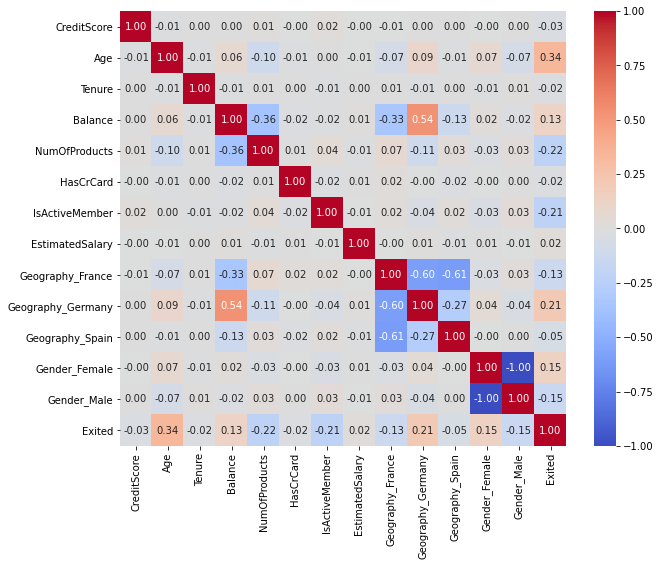

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [31]:
X_train = X_train.drop('Exited',axis=1)

In [32]:
 mutual_info = mutual_info_classif(X_train,y_train)

In [33]:
for i,feature in enumerate(X_train.columns):
     print(f"Feature '{feature}': Mutual Information = {mutual_info[i]}")

Feature 'CreditScore': Mutual Information = 0.005911615646227997
Feature 'Age': Mutual Information = 0.08472356633155753
Feature 'Tenure': Mutual Information = 0.0023339257932115665
Feature 'Balance': Mutual Information = 0.014213862556321288
Feature 'NumOfProducts': Mutual Information = 0.10071124798774544
Feature 'HasCrCard': Mutual Information = 0.011202353825372269
Feature 'IsActiveMember': Mutual Information = 0.026181649117624994
Feature 'EstimatedSalary': Mutual Information = 0.007917112273166271
Feature 'Geography_France': Mutual Information = 0.015003414279667782
Feature 'Geography_Germany': Mutual Information = 0.021150948322017138
Feature 'Geography_Spain': Mutual Information = 0.0029520168400087865
Feature 'Gender_Female': Mutual Information = 0.014820020267917844
Feature 'Gender_Male': Mutual Information = 0.01807892516493448


In [34]:
# Feature Engineering

In [35]:
X_train['Balance_Salary_ratio'] = X_train['Balance']/X_train['EstimatedSalary']

In [36]:
mutual_info_1 = mutual_info_classif(X_train,y_train)

In [37]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Balance_Salary_ratio'],
      dtype='object')

In [38]:
for i,feature in enumerate(X_train.columns):
     print(f"Feature '{feature}': Mutual Information = {mutual_info_1[i]}")

Feature 'CreditScore': Mutual Information = 0.005236184310829728
Feature 'Age': Mutual Information = 0.08299636098258834
Feature 'Tenure': Mutual Information = 0.0038373305330383634
Feature 'Balance': Mutual Information = 0.01528542126027177
Feature 'NumOfProducts': Mutual Information = 0.09904390141799313
Feature 'HasCrCard': Mutual Information = 0.010866049791074195
Feature 'IsActiveMember': Mutual Information = 0.030464427083179535
Feature 'EstimatedSalary': Mutual Information = 0.006717072865971119
Feature 'Geography_France': Mutual Information = 0.014183233739634815
Feature 'Geography_Germany': Mutual Information = 0.023446773837961565
Feature 'Geography_Spain': Mutual Information = 0.003780183535934345
Feature 'Gender_Female': Mutual Information = 0.012852729153429054
Feature 'Gender_Male': Mutual Information = 0.015532152794205167
Feature 'Balance_Salary_ratio': Mutual Information = 0.008606843672012143


In [39]:
X_train = X_train.drop('Balance_Salary_ratio',axis=1)

In [40]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [41]:
X_valid.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [42]:
bank_test_1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [43]:
#model_1 = RandomForestClassifier(n_estimators=1000,max_depth=4)

In [44]:
#model_1.fit(X_train,y_train)

In [45]:
#y_pred_1 = model_1.predict(X_valid)

In [46]:
#roc_curve = roc_auc_score(y_valid,y_pred_1)

In [47]:
#print(roc_curve)

In [48]:
model_2 = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,objective='binary:logistic')

In [49]:
model_2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
y_pred_2 = model_2.predict(X_valid)

In [51]:
roc_curve = roc_auc_score(y_valid,y_pred_2)

In [52]:
print(roc_curve)

0.7504767846556507


In [54]:
y_pred_3 = model_2.predict(bank_test_1)

In [56]:
submission = pd.DataFrame({'id':bank_test['id'],'Exited':y_pred_3})

In [57]:
submission.to_csv("submission.csv",index=False)